# Complete Sentiment Analysis Suite 

The Choate from **Chaitanya Madhu**

https://www.linkedin.com/in/chaitanyamadhu/

This notebook outlines various methods to perform Sentiment Analysis using Python: 

1. **Load and Use a pre-trained NLP library**
    - a. **NLTK - VADER Sentiment Analyzer**

    - b. **TextBlob Sentiment Analyzer**

    _Requires no model training. Simply, load the ready-to-use classifier and apply it on real-time data._

2. **Create and Use a custom Machine Learning (ML) model**

    _Requires model training and involves building an ML model from scratch._

3. **Use a Deep Learning (DL) model**

    - a. **Use a pre-trained Deep Learning model pipeline (Transformers)**

        _Requires no model training. Simply, load the ready-to-use classifier and apply it on real-time data._
    - b. **Apply transfer learning on a pre-trained Deep Learning model (fine-tune DistillBERT)**

        _Involves loading a pre-trained model and training/fine-tuning it on a small custom dataset._
    - c. **Create and Use a custom Deep Learning model (built-from-scratch)**

        _Requires model training and involves building a DL model from scratch._


_**Note: Sentiment Analysis implemented in this notebook refers to "Standard Sentiment Analysis" i.e., outputs Positive, Neutral, or Negative labels with a confidence score.**_

# 1.a. Standard Sentiment Analysis using a Pre-trained NLP Library: NLTK - VADER
- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. 
- In the below code illustration, the VADER Sentiment Analyzer is imported from NLTK Python Package and used to perform Sentiment Analysis on new test data. 

In [2]:
# import libraries 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
sentiment = SentimentIntensityAnalyzer()

text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)

print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


# 1.b. Standard Sentiment Analysis using a Pre-trained NLP Library: TextBlob
- TextBlob is a Python Library for NLP tasks 
- It takes text as an input and can return polarity and subjectivity as outputs. 
    - Polarity determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

    - Subjectivity determines whether a text input is factual information or a personal opinion. Its value lies between [0,1] where a value closer to 0 denotes a piece of factual information and a value closer to 1 denotes a personal opinion.

In [5]:
# import libraries
from textblob import TextBlob

In [6]:
text_1 = "The movie was so awesome."
text_2 = "The food here tastes terrible."
text_3 = "The talk seems decent"

# Determining the Polarity 
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity
p_3 = TextBlob(text_3).sentiment.polarity

# Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity
s_3 = TextBlob(text_3).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Polarity of Text 3 is", p_3)
print("\n")
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)
print("Subjectivity of Text 3 is", s_3)

Polarity of Text 1 is 1.0
Polarity of Text 2 is -1.0
Polarity of Text 3 is 0.16666666666666666


Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0
Subjectivity of Text 3 is 0.6666666666666666


# 2. Standard Sentiment Analysis using a custom Machine Learning Model (built-from-scratch)
- In simple terms, this is a Supervised Learning - Multi-Class Classification usecase, where a custom ML model is trained from scratch on custom labelled data. 
- The steps involved in creating a sentiment analysis ML Model are as follows:
  - a. import custom dataset. The current dataset being used is a Finance Dataset from Kaggle. 
    https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis
  - b. Pre-Process the text of training data (Text pre-processing involves Normalization, Tokenization, Stopwords Removal, and Stemming/Lemmatization). 
  - c. Transform the textual columns into vector representations. 
  - d. Split the dataset into train and validation sets. 
  - d. Define various ML Models and train them on the train dataset. Test them against the test datset and compute evaluation scores.
  - e. Based on the computed evaluation scores, pick the best fine-tuned model along with the hyper-parameters and train it on the whole dataset, without any train and test splits. 
  - f. Apply the finalized Sentiment Analysis ML Model on real-time testing data to make predictions. 


In [27]:
# import libraries 

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from wordcloud import WordCloud

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, classification_report

import joblib

In [9]:
# Load the Dataset

data = pd.read_csv('Finance_data.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [10]:
### Data Cleaning ### 

# convert to lowercase 
data['Sentence'] = data['Sentence'].apply(lambda x: str(x).lower())

# Remove Numbers 
data['Sentence'] = data['Sentence'].str.replace('\d+', '', regex=True)

# Remove Special Characters 
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x)) 

# Drop Missing Values
print("Dataset shape before dropping missing values: ", data.shape)
data.dropna(inplace=True)
print("Dataset shape after dropping missing values: ", data.shape)

# Drop Duplicates
print("Dataset shape before dropping duplicate values: ", data.shape)
data = data.drop_duplicates(subset = ["Sentence"], keep='last')
print("Dataset shape after dropping duplicate values: ", data.shape)

data

Dataset shape before dropping missing values:  (5842, 2)
Dataset shape after dropping missing values:  (5842, 2)
Dataset shape before dropping duplicate values:  (5842, 2)
Dataset shape after dropping duplicate values:  (5295, 2)


,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,according shipping company viking line the eu...,neutral
5840,in the building and home improvement trade sa...,neutral


- No Missing values exists in both columns of the dataset 
- Duplicates are detected and removed 

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_55180\3423269174.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  center_circle = plt.Circle((0, 0), 0.3, color='white', edgecolor='gray', linewidth=1.25)


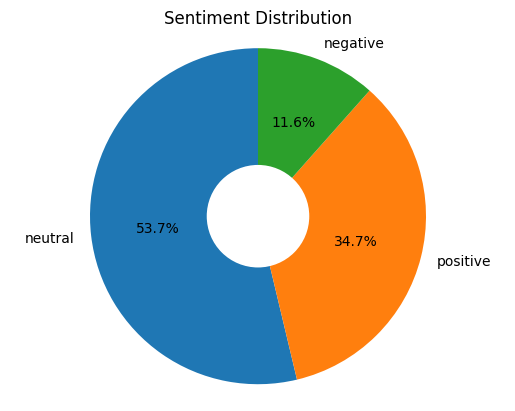

In [11]:
### Data Visuzalization 1 ###

# Plotting the donut plot to visualize distribution for the column "Sentiment"
sentiment_counts = data['Sentiment'].value_counts()
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.7))
ax.set_title('Sentiment Distribution')
# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.3, color='white', edgecolor='gray', linewidth=1.25)
ax.add_patch(center_circle)
# Equal aspect ratio ensures that the donut is drawn as a circle.
ax.axis('equal')
# Show the donut chart
plt.show()

Topic #1: company, said, production, new, finnish, oy, capacity, solution, plant, investment
Topic #2: report, company, services, data, operations, market, buy, basware, research, media
Topic #3: eur, mn, net, profit, sales, operating, million, period, quarter, year
Topic #4: shares, finland, number, business, share, helsinki, rights, voting, sales, company
Topic #5: percent, million, sales, market, company, approximately, tsla, said, group, euros
Topic #6: mln, euro, finnish, contract, company, said, finland, new, paper, manufacturing
Topic #7: company, bank, group, plc, finnish, business, services, finland, market, said
Topic #8: share, eur, finnish, oyj, said, company, today, hel, board, omx
Topic #9: nokia, services, mobile, business, said, solutions, products, new, company, long
Topic #10: aapl, company, short, expected, long, spy, finnish, fb, close, looking


C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_55180\1415229120.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dominant_Topic'] = lda.transform(X).argmax(axis=1)


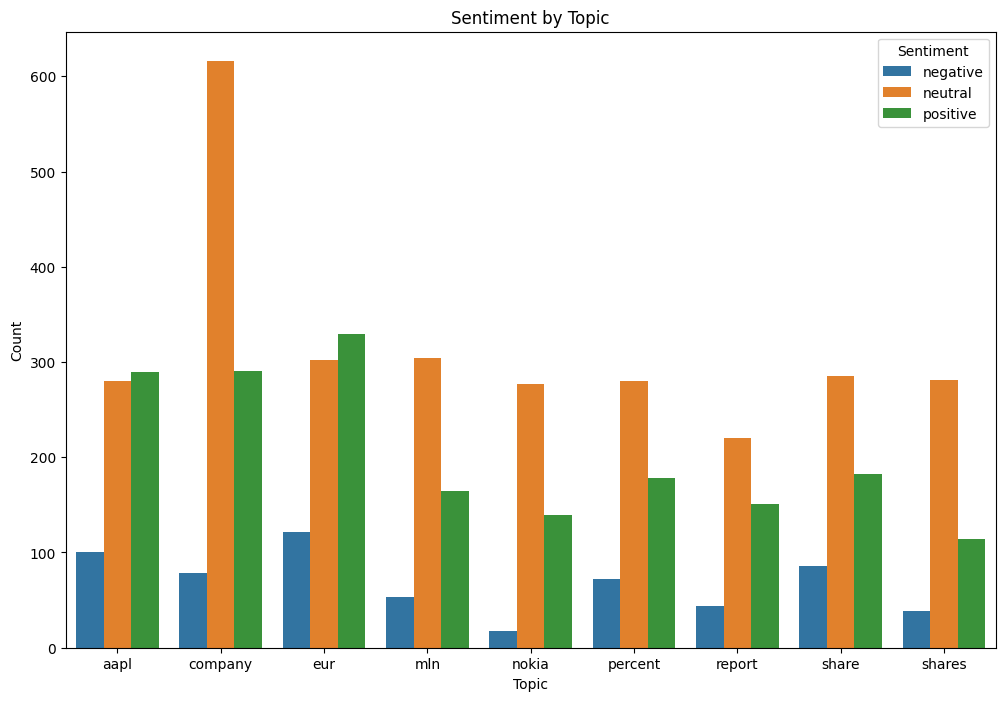

In [12]:
### Data Visuzalization 2 ###

# Topic Modeling - Generate Topics based on the column "Sentence"

vectorizer = CountVectorizer(max_df=0.85, max_features=5000, stop_words='english') # Vectorize the text data
X = vectorizer.fit_transform(data['Sentence'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 10  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10  # You can adjust the number of top words to display

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


    
    
# Plotting the bar plot to visualize distribution for the column "Sentiment", based on the topics generated 

sentences = data['Sentence']
sentiments = data['Sentiment']

# Get the dominant topic for each sentence
data['Dominant_Topic'] = lda.transform(X).argmax(axis=1)

# Extract the most representative word for each topic (as discussed earlier)
feature_names = vectorizer.get_feature_names_out()
topic_labels = []

for topic_idx, topic in enumerate(lda.components_):
    top_word_idx = topic.argmax()
    top_word = feature_names[top_word_idx]
    topic_labels.append(top_word)

# Combine Sentiment, Dominant_Topic, and Topic_Label into a new DataFrame
df_combined = pd.concat([data['Sentiment'], data['Dominant_Topic']], axis=1)
df_combined['Topic_Label'] = df_combined['Dominant_Topic'].map(lambda x: topic_labels[x])

# Count the occurrences of each combination
topic_sentiment_counts = df_combined.groupby(['Topic_Label', 'Sentiment']).size().reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Topic_Label', y='Count', hue='Sentiment', data=topic_sentiment_counts)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Sentiment by Topic')
plt.show()


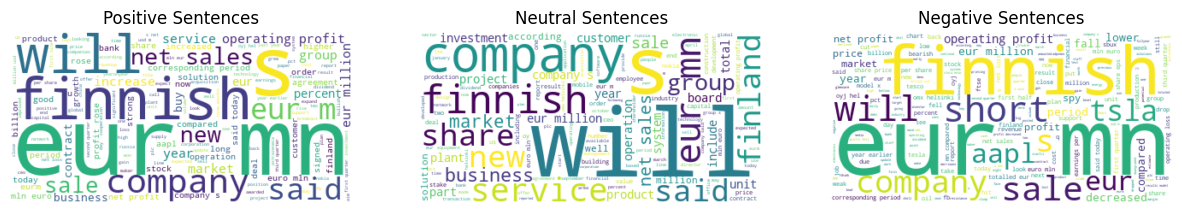

In [23]:
### Visualization - 3 ### 

# Separate positive and negative sentences
positive_tweets = " ".join(data[data['Sentiment'] == 'positive']['Sentence'])
neutral_tweets = " ".join(data[data['Sentiment'] == 'neutral']['Sentence'])
negative_tweets = " ".join(data[data['Sentiment'] == 'negative']['Sentence'])

# Create WordCloud for Positive Tweets
wordcloud_positive = WordCloud(width=400, height=200, random_state=21, max_font_size=110, background_color='white').generate(positive_tweets)
# Create WordCloud for Neutral Tweets
wordcloud_neutral = WordCloud(width=400, height=200, random_state=21, max_font_size=110, background_color='white').generate(neutral_tweets)
# Create WordCloud for Negative Tweets
wordcloud_negative = WordCloud(width=400, height=200, random_state=21, max_font_size=110, background_color='white').generate(negative_tweets)

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the WordClouds
axs[0].imshow(wordcloud_positive, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('Positive Sentences')

axs[1].imshow(wordcloud_neutral, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('Neutral Sentences')

axs[2].imshow(wordcloud_negative, interpolation="bilinear")
axs[2].axis('off')
axs[2].set_title('Negative Sentences')

plt.show()

In [24]:
# Split the dataset into train and eval sets 

data_train, data_test = train_test_split(data, test_size=0.25, stratify=data['Sentiment'], random_state=1)

X_train = data_train['Sentence']
X_test = data_test['Sentence']
y_train = data_train['Sentiment']
y_test = data_test['Sentiment']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3971,)
(3971,)
(1324,)
(1324,)


In [14]:
### Word Representations - Embedding and Encoding ### 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Embedding X using TF-IDF 
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_embedded = vectorizer.fit_transform(X_train)
X_test_embedded = vectorizer.transform(X_test)

### Encoding y using LabelEncoder 
sentiment_encoder = LabelEncoder()
y_train_encoded = sentiment_encoder.fit_transform(y_train)
y_test_encoded = sentiment_encoder.transform(y_test)

In [15]:
# Model Training and Evaluation 

# define a list of classifiers for iteration 
classifiers = [
    ('Naive Bayes', MultinomialNB(), {}), 
    ('Logistic Regression', LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10]}), 
    ('SVM', OneVsRestClassifier(SVC()), {'estimator__C': [0.1, 1, 10], 'estimator__kernel': ['linear', 'rbf']}), 
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}), 
    ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}), 
    ('SGD Classifier', SGDClassifier(), {'max_iter': [100, 200, 300], 'loss': ['hinge', 'log']}), 
    ('XGBoost', XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
]
best_model = None
best_score = 0.0 

# iterate through classifiers and perform hyperparameter tuning 
for name, classifier, param_grid in classifiers:
    print(f"Training and Tuning: {name} ...")

    grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=1)
    grid_search.fit(X_train_embedded, y_train_encoded)

    y_pred_encoded = grid_search.predict(X_test_embedded)
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
    hamming = hamming_loss(y_test_encoded, y_pred_encoded)

    print(f"{name}: ")
    print(f"    Accuracy: {accuracy:.4f}\n    F1-Score: {f1:.4f}\n    Hamming Loss: {hamming:.4f}")
    print("______________________________________________________________________________________")

    if accuracy > best_score: 
        best_score = accuracy
        best_model = grid_search.best_estimator_

print(f"\nBest Model: {best_model}\n")

Training and Tuning: Naive Bayes ...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Naive Bayes: 
    Accuracy: 0.7017
    F1-Score: 0.6599
    Hamming Loss: 0.2983
______________________________________________________________________________________
Training and Tuning: Logistic Regression ...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; to

C:\Users\CHAITANYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CHAITANYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CHAITANYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\CHAITANYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   2.7s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.7s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.5s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.8s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.0s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END ................lea

The whole dataset is split into train and validation datasets to compute evaluation scores on various model architectures. 

Now, the best model will be trained on the entire dataset to produce a stable model that can be applied efficiently on real-time data. 

In [25]:
# Training the finalized model on whole dataset (train+test) for real-time usage 

### Word Representations - Embedding and Encoding on the whole dataset ### 

X = data['Sentence']
y = data['Sentiment']

# Embedding total X using TF-IDF
X_embedded = vectorizer.fit_transform(X) # using the 'vectorizer' from above 
# Encoding total y using LabelEncoder
y_encoded = sentiment_encoder.fit_transform(y) # using the 'sentiment_encoder' from above 

In [26]:
# Selected Model Training on 100% data 

# model = OneVsRestClassifier(estimator=SVC(C=1, kernel='linear'))
model = XGBClassifier(n_estimators=100, learning_rate=0.01) # selecting this model, considering model generalization 
model.fit(X_embedded, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# Export/Save the trained ML Model 

# Save the model
joblib.dump(model, 'ml_model_dump/model_xgb.joblib')
# Save the vectorizer
joblib.dump(vectorizer, 'ml_model_dump/sentence_vectorizer.joblib')
# Save the sentiment encoder
joblib.dump(sentiment_encoder, 'ml_model_dump/sentiment_encoder.joblib')


['ml_model_dump/sentiment_encoder.joblib']

In [39]:
# Real-time Testing with Probability Scores

# Load the model
loaded_model = joblib.load('ml_model_dump/model_xgb.joblib')
# Load the vectorizer
loaded_vectorizer = joblib.load('ml_model_dump/sentence_vectorizer.joblib')
# Load the sentiment encoder
loaded_encoder = joblib.load('ml_model_dump/sentiment_encoder.joblib')


# new_sentences = ["This is a positive sentence.", "I don't like this at all.", "Neutral statement here."]
new_sentences = ["$NVDA The MACD histogram is displaying a positive divergence, suggesting a favorable outlook for the stock.", 
                 "Ongoing geopolitical tensions continue to impact the financial markets, creating a sense of caution among investors.", 
                 "$SPCE The company's recent announcement of delayed spaceflights has heightened investor skepticism, contributing to a significant drop in its stock value."
                ]
new_sentences_sentiments = ['positive', 'neutral', 'negative']

new_sentences_vectorized = loaded_vectorizer.transform(new_sentences)

# Check if the loaded model has a predict_proba method
if hasattr(loaded_model, "predict_proba"):
    probability_scores = loaded_model.predict_proba(new_sentences_vectorized)
else:
    # If the loaded model does not have predict_proba, try to use decision_function
    try:
        probability_scores = loaded_model.decision_function(new_sentences_vectorized)
    except AttributeError:
        raise AttributeError("The loaded model does not have either predict_proba or decision_function method.")

# Get the predicted labels
predictions_encoded = loaded_model.predict(new_sentences_vectorized)
predictions = loaded_encoder.inverse_transform(predictions_encoded)

# Get the class labels
class_labels = loaded_encoder.classes_

# Display predictions, class labels, and probability scores
for i, sentence in enumerate(new_sentences):
    print(f"Sentence: {sentence}")
    print(f"Predicted Sentiment: {predictions[i]}")
    print("Class Labels:", class_labels)
    print(f"Probability Scores: {probability_scores[i]}")
    print("\n")


Sentence: $NVDA The MACD histogram is displaying a positive divergence, suggesting a favorable outlook for the stock.
Predicted Sentiment: positive
Class Labels: ['negative' 'neutral' 'positive']
Probability Scores: [0.1761913  0.38173157 0.44207716]


Sentence: Ongoing geopolitical tensions continue to impact the financial markets, creating a sense of caution among investors.
Predicted Sentiment: neutral
Class Labels: ['negative' 'neutral' 'positive']
Probability Scores: [0.21156763 0.4746935  0.31373882]


Sentence: $SPCE The company's recent announcement of delayed spaceflights has heightened investor skepticism, contributing to a significant drop in its stock value.
Predicted Sentiment: neutral
Class Labels: ['negative' 'neutral' 'positive']
Probability Scores: [0.20334795 0.4951024  0.30154964]




The Classifier is decent and can be further improved using techniques like n-gram mappings. 

# 3.a. Standard Sentiment Analysis using a Deep Learning Model Pipeline (Transformers Pipeline) 
- Transformer-based models are one of the most advanced Natural Language Processing Techniques. They follow an Encoder-Decoder-based architecture and employ the concepts of self-attention to yield impressive results. 
- Building and Training Transformers from Scratch is technically and computationally expensive. Hence, a pre-trained transformer from Hugging Face is being used. 

In [40]:
from transformers import pipeline

In [41]:
sentiment_pipeline = pipeline("sentiment-analysis") 

# sentiment_pipeline = pipeline("sentiment-analysis", model="roberta-base") # Load the RoBERTa model

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [42]:
data = ["It was the best of times.", "It was the worst of times."]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9994569420814514},
 {'label': 'NEGATIVE', 'score': 0.9997925162315369}]

# 3.b. Standard Sentiment Analysis by Transfer Learning on a pre-trained Deep Learning Model (DistillBERT) 

- The above Transformer Model Pipeline works the best, yet it is a generalized model. It's prediction accuracy can be uplifted for custom use-cases by making the model more familiar with the labelled data related to the new use-case.
- This process of altering the output layers of the pre-trained DL model, to make it compatible in a new use-case, while preserving its acquired knowledge is Transfer Learning. 

In [64]:
# import libraries 

import pandas as pd 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizer

from datasets import load_dataset


In [48]:
# Load the imdb dataset - from the datasets library 

imdb = load_dataset("imdb")
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- The loaded IMDB Dataset comprises of 25,000 rows for training and 25,000 rows for testing.
- For ease of computation and illustration purposes, downscaling the data to 3000 randomly selected train and test sets. 

In [56]:
small_train_dataset = imdb["train"].shuffle(seed=42).select([i for i in list(range(3000))])
small_test_dataset = imdb["test"].shuffle(seed=42).select([i for i in list(range(3000))])

print(small_train_dataset)
print(small_test_dataset)

Dataset({
    features: ['text', 'label'],
    num_rows: 3000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 3000
})


In [57]:
small_train_dataset = pd.DataFrame(small_train_dataset)
small_test_dataset = pd.DataFrame(small_test_dataset)

In [58]:
X_train = small_train_dataset['text']
y_train = small_train_dataset['label']
X_test = small_test_dataset['text']
y_test = small_test_dataset['label']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000,)
(3000,)
(3000,)
(3000,)


In [ ]:
# load the tokenizer

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
# tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Tokenize the reviews
tokenized_data_train = tokenizer(X_train.to_list(), return_tensors="np", padding=True)
tokenized_data_test = tokenizer(X_test.to_list(), return_tensors="np", padding=True)

# Labels are one-dimensional numpy or tensorflow array of integers
labels_train = np.array(y_train)  
labels_test = np.array(y_test) 

# Tokenized ids
print(tokenized_data_train["input_ids"][0])

In [67]:
# Load model
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
# Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile model
model.compile(optimizer=Adam(5e-6), loss=loss, metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(dict(tokenized_data_train), 
          labels_train, 
          validation_data=(dict(tokenized_data_test), labels_test),
          batch_size=4, 
          epochs=2)


In [ ]:
# Predictions
y_test_predict = model.predict(dict(tokenized_data_test))['logits']

# First 5 predictions
y_test_predict[:5]

In [ ]:
# Predicted probabilities
y_test_probabilities = tf.nn.softmax(y_test_predict)

# First 5 predicted probabilities
y_test_probabilities[:5]

In [ ]:
# Predicted label
y_test_class_preds = np.argmax(y_test_probabilities, axis=1)

# First 5 predicted labels
y_test_class_preds[:5]

In [ ]:
# Accuracy
accuracy_score(y_test_class_preds, y_test)

In [ ]:
# Save tokenizer and model 
tokenizer.save_pretrained('./sentiment_transfer_learning_tensorflow/')
model.save_pretrained('./sentiment_transfer_learning_tensorflow/')

In [ ]:
# Load tokenizer and model to make predictions 
tokenizer = AutoTokenizer.from_pretrained("./sentiment_transfer_learning_tensorflow/")
loaded_model = TFAutoModelForSequenceClassification.from_pretrained('./sentiment_transfer_learning_tensorflow/')

In [ ]:
# Predict logit using the loaded model
y_test_predict = loaded_model.predict(dict(tokenized_data_test))['logits']

# Take a look at the first 5 predictions
y_test_predict[:5]

In [24]:
# apply the tokenizer 

def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True)
 
tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)

In [25]:
### Load the pretrained DistilBERT as the base model ### 

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2) # num_labels=2 represents the binary class values of the target variable 

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
import numpy as np
from datasets import load_metric
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [28]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import TrainingArguments, Trainer

from transformers import DataCollatorWithPadding
 
repo_name = "./distilbert-finetuned-imdb-3000"


# Define data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

 
training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)
 
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
# Save the fine-tuned model
trainer.save_pretrained("./distilbert-finetuned-imdb")
tokenizer.save_pretrained("./distilbert-finetuned-imdb")

trainer.push_to_hub()

# 3.c. Standard Sentiment Analysis using a custom Deep Learning Model (LSTM built-from-scratch) 
- When the size of the training datset grows large, advanced Deep Learning models can be employed in place of Machine Learning Models for improved precision in predictions.
- Dataset: IMDB Reviews Dataset
- DL Model: Many DL model architectures like LSTM, GRU, etc., can be used to build a Sentiment Analysis DL model. Currently, using the LSTM Model with Adam Optimizer for this execution. 
- The steps involved in creating a sentiment analysis DL Model are as follows:

  - a. import custom  dataset. IMDB Movie Reviews Dataset with 50K rows is used.
  - b. Pre-process and Clean the dataset. 
  - c. Transform the textual columns into vectors. 
  - d. Split the dataset into train and validation sets. 
  - d. Define a DL Model Architecture. Train the DL Model on the train dataset and evaluate against validation dataset. 
  - f. Apply the finalized Sentiment Analysis DL Model on real-time testing data to make predictions.
 
Train a suitable DL classification model on the processed data for sentiment classification. Currently, LSTM is being used. Add dropouts and tune the hyperparameters to get a good accuracy score. 


In [23]:
# import libraries 

from datasets import load_dataset
import re

import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model


In [2]:
# Load the imdb dataset - from the datasets library 

imdb = load_dataset("imdb")
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [3]:
small_train_dataset = imdb["train"].shuffle(seed=42).select([i for i in list(range(10000))])
small_test_dataset = imdb["test"].shuffle(seed=42).select([i for i in list(range(10000))])

print(small_train_dataset)
print(small_test_dataset)

Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})


In [4]:
train_df = pd.DataFrame(small_train_dataset)
test_df = pd.DataFrame(small_test_dataset)

In [5]:
print(train_df.shape)
train_df.head()

(10000, 2)


,text,label
0,There is no relation at all between Fortier an...,1
1,This movie is a great. The plot is very true t...,1
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0
3,In the process of trying to establish the audi...,1
4,"Yeh, I know -- you're quivering with excitemen...",0


In [6]:
print(test_df.shape)
test_df.head()

(10000, 2)


,text,label
0,<br /><br />When I unsuspectedly rented A Thou...,1
1,This is the latest entry in the long series of...,1
2,This movie was so frustrating. Everything seem...,0
3,"I was truly and wonderfully surprised at ""O' B...",1
4,This movie spends most of its time preaching t...,0


In [7]:
### Clean Dataset ### 

english_stops = set(stopwords.words('english'))
print("Stop Words: \n", english_stops, "\n\n\n")

def preprocess_data(x_data, y_data):
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case

    return x_data, y_data

X_train, y_train = preprocess_data(train_df['text'], train_df['label'])
X_test, y_test = preprocess_data(test_df['text'], test_df['label'])

print('Train Set: ')
print(X_train, '\n')
print(X_test, '\n')
print('Test Set: ')
print(y_train, '\n')
print(y_test)

Stop Words: 
 {"wouldn't", 'is', 'where', 'its', 'were', 'other', 'won', 'doesn', 'themselves', 'from', "shouldn't", 'out', 'here', 'very', 't', 'after', 'because', 'shan', 'for', 'just', 'y', 'being', 'an', 'are', "she's", 'nor', 'haven', "mustn't", 'hadn', 'whom', 'a', 'isn', "shan't", 'we', 'more', 'who', 'why', 'ain', 'same', 'll', 'ma', 'through', 'her', 're', 'can', 'mustn', 'into', 'both', 'but', 'weren', 've', 'it', 'him', 'during', 'against', "you're", "didn't", 'doing', 'those', "doesn't", "you'd", 'most', 'this', 'theirs', 'on', 'off', 'been', 'has', 'at', 'herself', 'shouldn', 'am', 'all', "isn't", "hasn't", 'that', 'didn', 'too', 'aren', 'again', 'he', 'them', "hadn't", 'my', 'as', "wasn't", 'which', 'o', 'further', 'd', 'was', 'each', 'not', "needn't", 'to', 'up', 'did', 'itself', 'once', 'had', 'while', 'there', 'these', 'below', "aren't", 'over', 'about', "won't", 'before', 'be', 'ourselves', 'have', 'do', 'so', "weren't", 'any', 'm', 'she', 'hasn', 'when', "don't", 'sh

In [8]:
# Transform words in 'Reviews' to numbers 

token = Tokenizer(lower=False) 
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)


# Each reviews has a different length, so use padding by adding 0 or truncating the words to the same length or by using mean of all reviews length 
def get_max_length(data_col):    # Deduce the maximum review length, by calculating the mean of all review lengths
    review_length = []
    for review in data_col:
        review_length.append(len(review))
    return int(np.ceil(np.mean(review_length)))

max_length = get_max_length(X_train)
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post') # padding using mean length 
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post') # padding using mean length 


total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', X_train, '\n')
print('Encoded X Test\n', X_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[   47  4361 16330 ...     0     0     0]
 [    9     3    23 ...     0     0     0]
 [  630  1530 31681 ...     0     0     0]
 ...
 [   59     5    64 ... 11932   538  1823]
 [   22  5260 50885 ...  3571  5294   603]
 [    1    73     6 ...     0     0     0]] 

Encoded X Test
 [[  173     1  1470 ...   508   179    18]
 [    9  2501  2859 ...     0     0     0]
 [    9     3  5525 ...     0     0     0]
 ...
 [  701  2299  5858 ...     0     0     0]
 [    1   855     9 ...     0     0     0]
 [13045   584  2353 ...     0     0     0]] 

Maximum review length:  131


In [24]:
### Build DL Model Architecture ### 

model = Sequential()
model.add(Embedding(total_words, 32, input_length=max_length))
model.add(Flatten())  # Flatten layer to convert 3D input to 2D
model.add(Dense(64, activation='relu'))  # Adding a dense layer with 64 units and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 131, 32)           1628480   
                                                                 
 flatten (Flatten)           (None, 4192)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                268352    
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1896897 (7.24 MB)
Trainable params: 1896897 (7.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


- **Embedding Layer:** creates word vectors of each word in the word_index and group words that are related or have similar meaning by analyzing other words around them.
- **
LSTM Laye**r: to make a decision to keep or throw away data by considering the current input, previous output, and previous memoryMi- **ctions
Dens**e Layer: compute the input with the weight matrix and bias (optional), and using an activation f Here, . I use Sigmoid activation fis used is work because the oubinary (is onl)y 0- **Optimizer and Loss Function:**  or 1.

The optimizer is Adam and the loss function is Binary Crossentroause again the binaryu(t oron). ry number.

In [25]:
# add a checkpoint to save the model locally for every epoch if its accuracy improved from the previous epoch 
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [26]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, callbacks=[checkpoint], validation_data=(X_test, y_test))


Epoch 1/10
77/79 [============================>.] - ETA: 0s - loss: 0.6622 - accuracy: 0.6048
Epoch 1: accuracy improved from -inf to 0.60670, saving model to models\LSTM.h5
79/79 [==============================] - 2s 12ms/step - loss: 0.6604 - accuracy: 0.6067 - val_loss: 0.5091 - val_accuracy: 0.7853
Epoch 2/10
15/79 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.9068

C:\Users\CHAITANYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/79 [===========================>..] - ETA: 0s - loss: 0.2379 - accuracy: 0.9172
Epoch 2: accuracy improved from 0.60670 to 0.91800, saving model to models\LSTM.h5
79/79 [==============================] - 1s 10ms/step - loss: 0.2351 - accuracy: 0.9180 - val_loss: 0.3631 - val_accuracy: 0.8371
Epoch 3/10
76/79 [===========================>..] - ETA: 0s - loss: 0.0294 - accuracy: 0.9956
Epoch 3: accuracy improved from 0.91800 to 0.99540, saving model to models\LSTM.h5
79/79 [==============================] - 1s 10ms/step - loss: 0.0300 - accuracy: 0.9954 - val_loss: 0.3907 - val_accuracy: 0.8364
Epoch 4/10
77/79 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9997
Epoch 4: accuracy improved from 0.99540 to 0.99970, saving model to models\LSTM.h5
79/79 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 0.9997 - val_loss: 0.4289 - val_accuracy: 0.8322
Epoch 5/10
76/79 [===========================>..] - ETA: 0s - loss: 0.0033 - accuracy: 0.9

- For Training, using mini-batch learning method with a batch_size of 128 and 5 epochs

In [27]:
### Model Evaluation ### 

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.4f} %".format(accuracy*100))
print("Test Loss: ", loss)


313/313 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.8366
Test Accuracy: 83.6600 %
Test Loss:  0.4928743541240692


In [31]:
### Model Evaluation ### 

# # Get raw predictions
# y_pred_prob = model.predict(X_test, batch_size=128)

# # Convert raw predictions to class predictions
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Calculate accuracy
# accuracy = np.sum(y_pred == y_test) / len(y_test) * 100

# print('Correct Prediction: {}'.format(np.sum(y_pred == y_test)))
# print('Wrong Prediction: {}'.format(len(y_test) - np.sum(y_pred == y_test)))
# print('Accuracy: {:.2f}%'.format(accuracy))

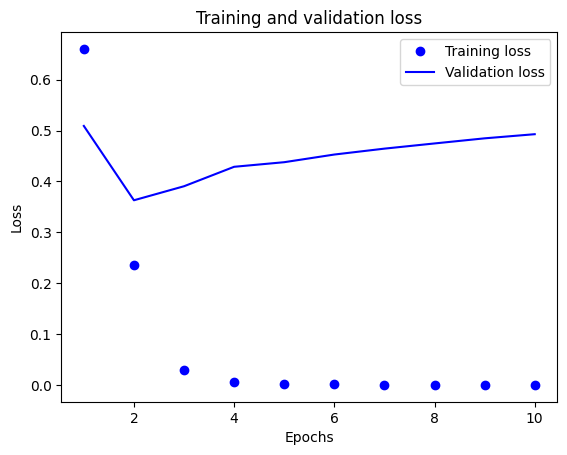

In [28]:
# VALIDATION LOSS curves
history_dict = history.history
history_dict.keys()

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

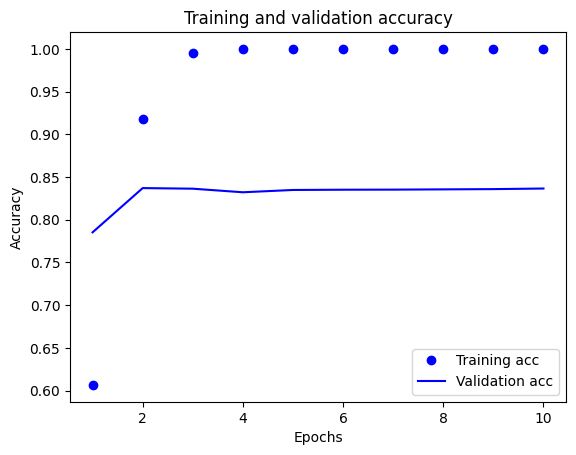

In [29]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
### real-time testing ### 

review = "Nothing was typical about this. Everything was beautifully done in this movie, the story, the flow, the scenario, everything. I highly recommend it for mystery lovers, for anyone who wants to watch a good movie!"

# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)


tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

result = model.predict(tokenize_words)
print(result, "\n")

if result >= 0.7: # Using a threshold of 0.7 to deduce the sentiment label 
    print('positive')
else:
    print('negative')
    

Cleaned:  Nothing was typical about this Everything was beautifully done in this movie the story the flow the scenario everything I highly recommend it for mystery lovers for anyone who wants to watch a good movie
Filtered:  ['nothing typical everything beautifully done movie story flow scenario everything i highly recommend mystery lovers anyone wants watch good movie']
[[  81  669  188 1273  128    3   13 2716 2690  188    1  444  273  662
  1891  164  409   35    8    3    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    